# World Happiness Project

Data Description:-

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

As we have some idea about the data now we will import all the python libraries for doing data importaion, EDA, Data Cleaning, Data Scaling, Removing Skewness, Removing Outlier and building the model

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import warnings
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, power_transform, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

As we have finished importing the necessary libraries now we will import the dataset 

In [2]:
# BY usind pd.read_csv() we import the dataset and store it in a variable ds
ds = pd.read_csv('~/Desktop/World Happiness Report/happinessscore.csv')

We have successfully imported our dataset in variable ds lets see what is the data type of the variable ds

In [3]:
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


By looking at above tab we came to know that the varible ds is a pandas.DataFrame type

Now we will look at the dimensions of the dataset

In [4]:
r, c = ds.shape

In [5]:
print("In the happiness score dataset there are total {} no of rows and {} no of columns".format(r,c))

In the happiness score dataset there are total 158 no of rows and 12 no of columns


By looking at the above tab we came to know that there are 158 rows and 12 columns.(its a pretty small dataset)

Now we will look into dataset what type of data are present in the columns

In [6]:
ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


ds.head() gives first 5 rows and by looking first 5 rows we come to know that the dataset is a mixture of float and string values

Lets get more information from the dataset

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

By looking at the above tab we come to know that the first 2 columns are object type and the happiness rank is integer type and rest of the columns are float

Now we will take a look into some statistical description of data but there is a problem we will not be able to see any statistical information about the first 2 columns as they are object

In [8]:
ds.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


By looking at above statistical description of data we see very less difference between the Standard Deviation and Mean so there are very less outliers in the dataset

In [9]:
ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


By looking at the dataset we came to know that it is a Regression Problem as we have to predict Happiness Score

## Here we will start the EDA of the data to know more about the data using visualization 

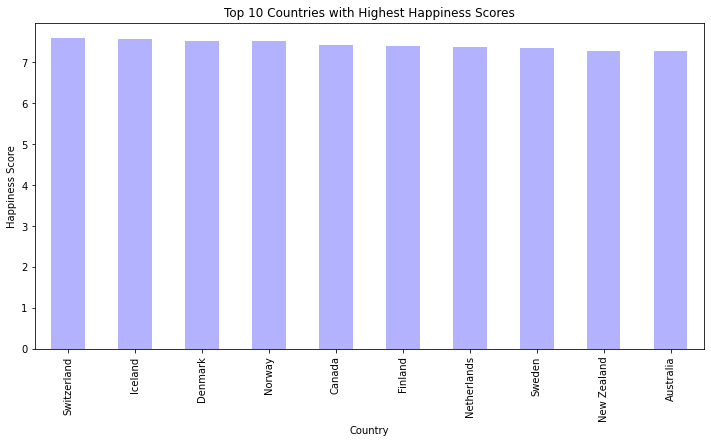

In [10]:
plt.title('Top 10 Countries with Highest Happiness Scores')
plt.ylabel("Happiness Score")
ds.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='blue', alpha = 0.3)

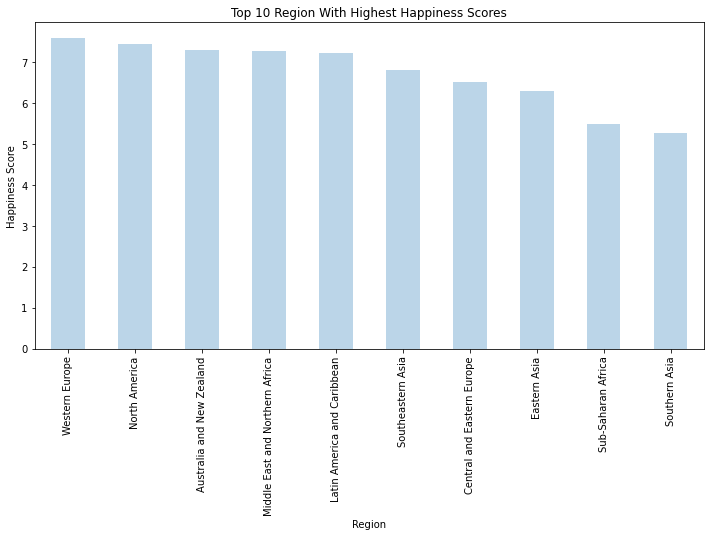

In [11]:
plt.title("Top 10 Region With Highest Happiness Scores")
plt.ylabel("Happiness Score")
ds.groupby('Region')['Happiness Score'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6), alpha = 0.3)

From Above two plots we came to know about the top 10 Countries and Regoin with highest number of Happiness Score

Now we will Look at the country and Region which has Lowest Happiness Score

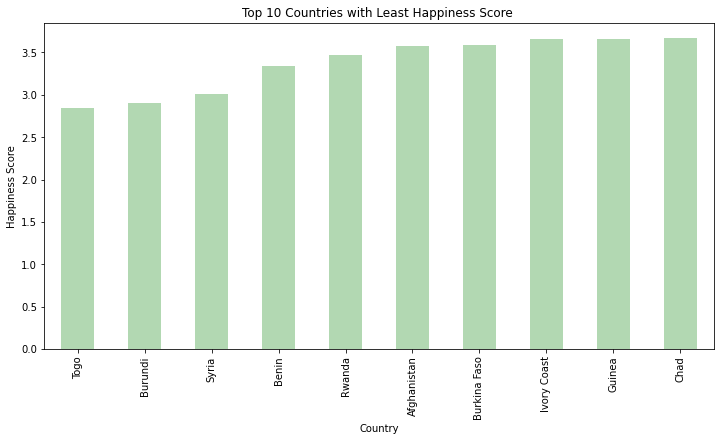

In [12]:
plt.title("Top 10 Countries with Least Happiness Score ")
plt.ylabel("Happiness Score")
ds.groupby('Country')['Happiness Score'].min().sort_values(ascending=True).head(10).plot(kind = 'bar', figsize = (12,6), color = 'green', alpha = 0.3)

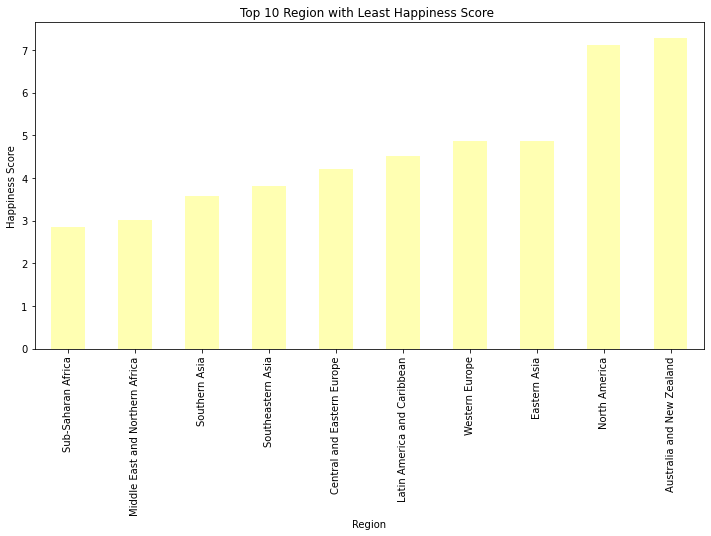

In [13]:
plt.title("Top 10 Region with Least Happiness Score ")
plt.ylabel("Happiness Score")
ds.groupby('Region')['Happiness Score'].min().sort_values(ascending=True).head(10).plot(kind = 'bar', figsize = (12,6), color = 'yellow', alpha = 0.3)

Now we will convert the Object variable to integer so that we can get similar kind of data and do further analysis of data to convert the data to integer we will use label encoder

In [14]:
le = LabelEncoder()

In [15]:
le = ds.apply(le.fit_transform)

In [16]:
le.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,156,19,151,154,148,156,150,115,125
1,58,9,1,155,100,136,157,150,143,98,144,134
2,37,9,2,154,16,139,155,128,151,153,129,122
3,105,9,3,153,50,153,152,132,157,143,132,118
4,24,5,4,152,26,140,151,140,145,141,145,116


In [17]:
#Now lets save the label endoded value in our primary variable
le = ds

As we have converted all the columns in numeric values we will now do more analysis on all the data

Now we will check if there is any missing value in the data if present we will do mean, median or mode operations to fill that row or column so that we don't loose any data

In [18]:
ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

By looking at the above tab we come to know that there is no missing values in the dataset lets see its visualization

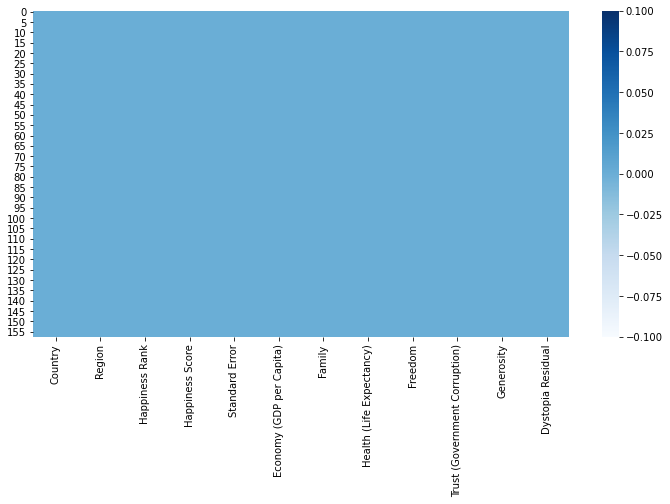

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.isnull(), cmap='Blues')

By looking at the above visualization we came to know that there is no missing values in the data as there is no white line in the above visualization

now lets check the correlation of the dataset as all the values are integer 

In [20]:
ds.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


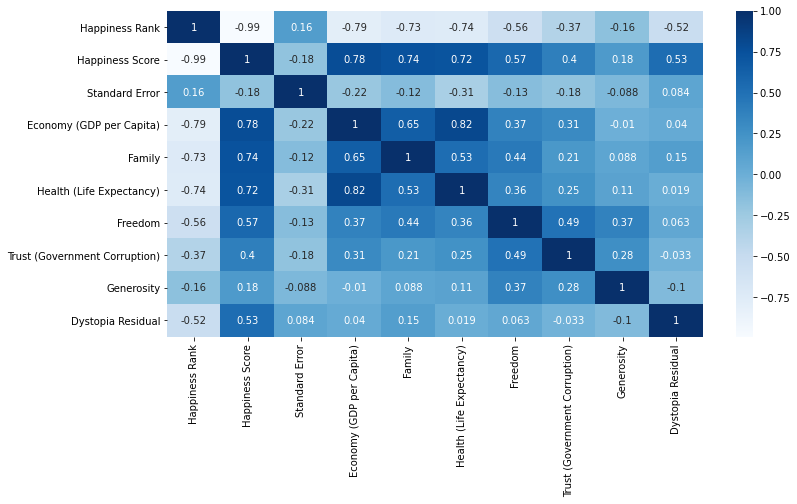

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.corr(), annot=True, cmap = 'Blues')

As from the above figure we dont see any correlation between Country, Region and all the other columns we will drop the column Country & Region from out ds variable

In [22]:
ds.drop(['Country','Region'], axis = 1, inplace=True)

In [23]:
ds.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


From above table we confirm that we have removed two columns which was not having any relation with other columns

Now we will check if there is any skewness or outliers in the datasets

For skewness detection we will use ds.skew()

In [24]:
ds.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

From above tab we can see the skewness of the data and come to know that some values are left skewed and some are right skewed so we will make it normal distrubuted first lets see the graphical representation of the skewness in the data

In [25]:
col = ['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']

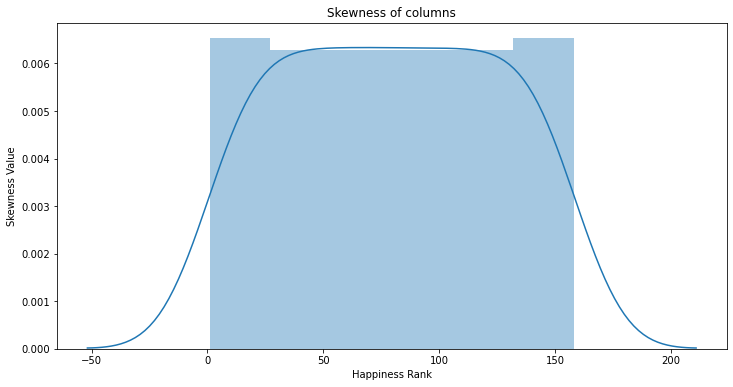

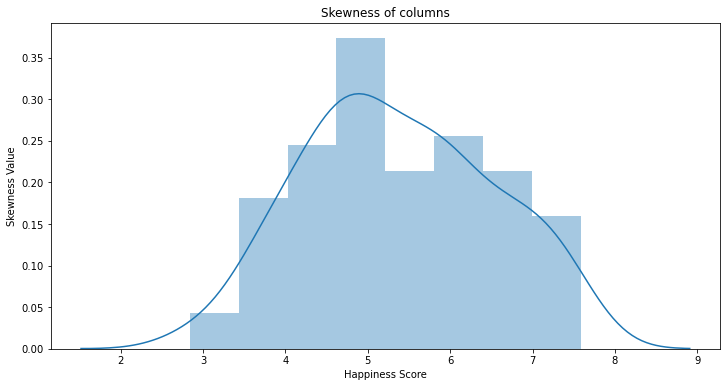

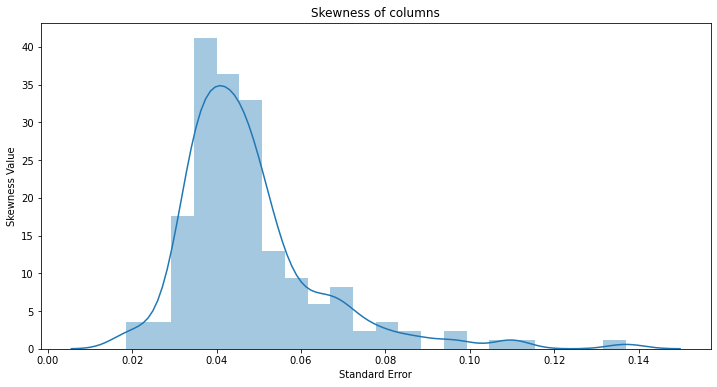

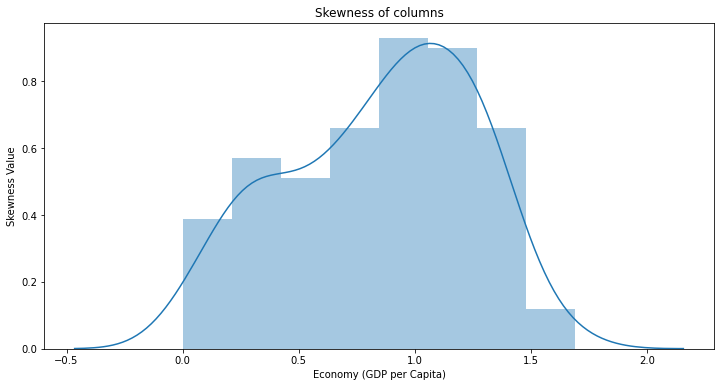

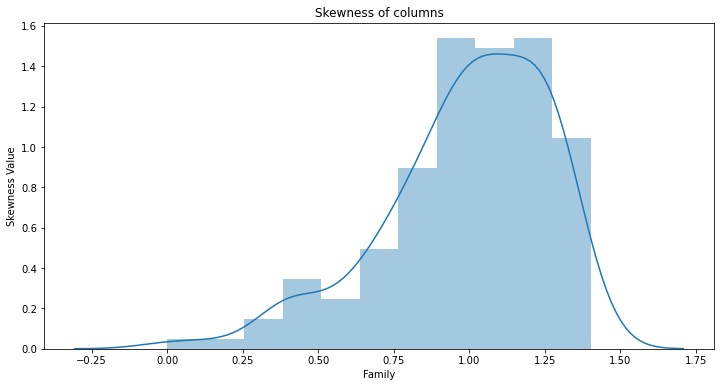

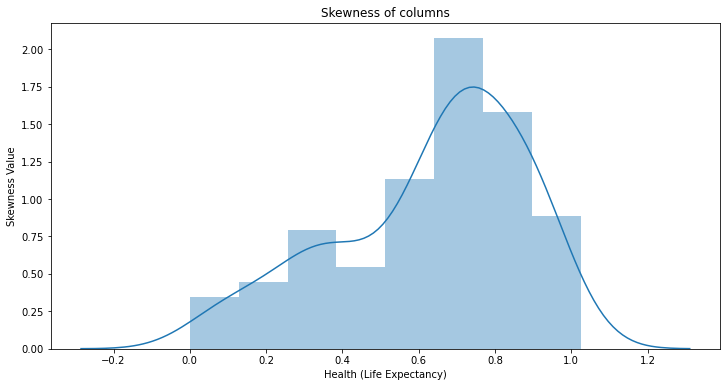

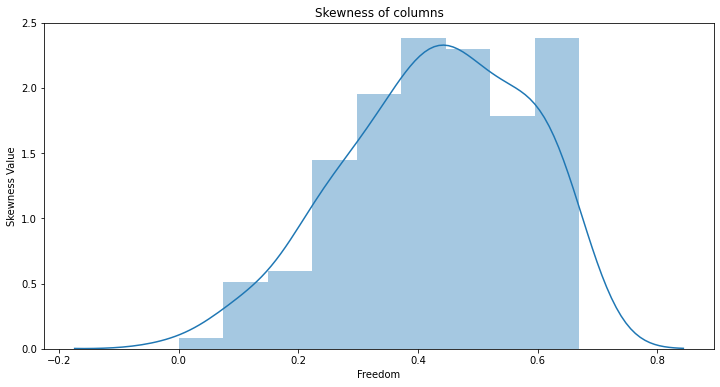

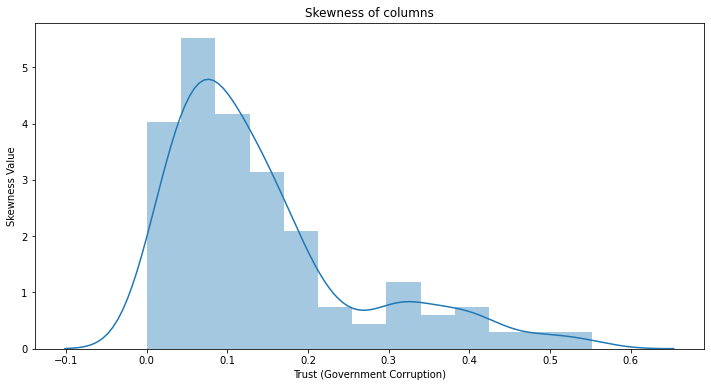

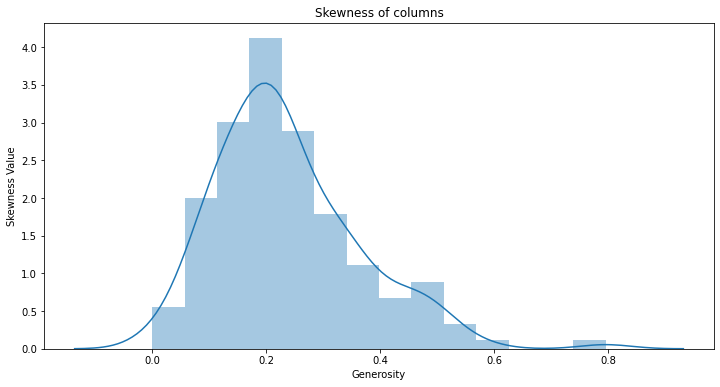

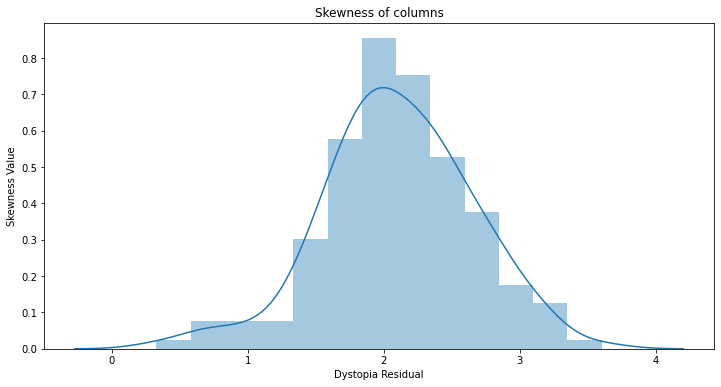

In [26]:
for i in col:
    plt.figure(figsize = (12,6))
    plt.title("Skewness of columns")
    plt.ylabel("Skewness Value")
    sns.distplot(ds[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a2d93a0>,
      dtype=object)

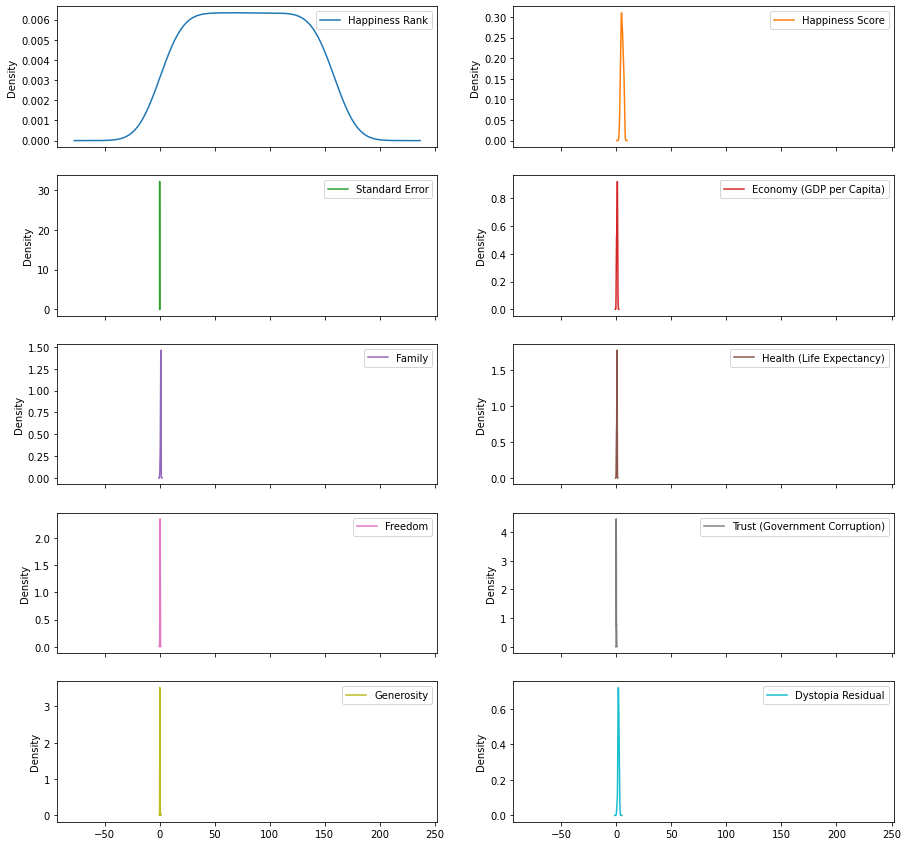

In [27]:
ds.plot(kind='kde', subplots = True, figsize=(15,15), layout = (5,2))

from above visulization we clearly see some of the columns are skewed so now we will fix it using powertransformation or by using log, sqrt, cbrt

In [28]:
dsnew = power_transform(ds)
dsnew = pd.DataFrame(dsnew, columns = ds.columns)
dsnew.skew()

Happiness Rank                  -0.264365
Happiness Score                 -0.027956
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

As we can see from the above tab that all the skewness value has been normalize so now now will save it in our primary variable and then we will again see the skewness visualization

In [29]:
dsnew = ds

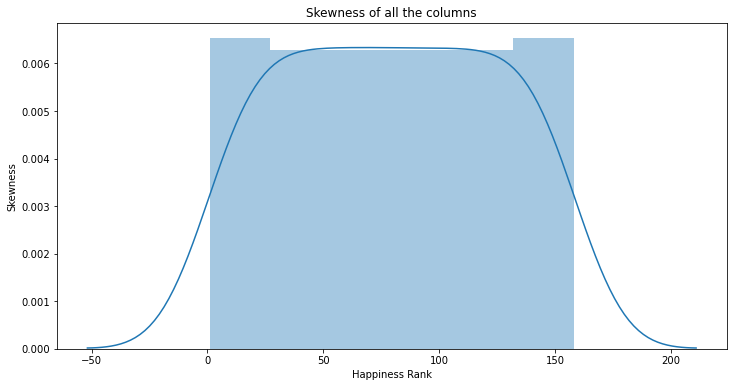

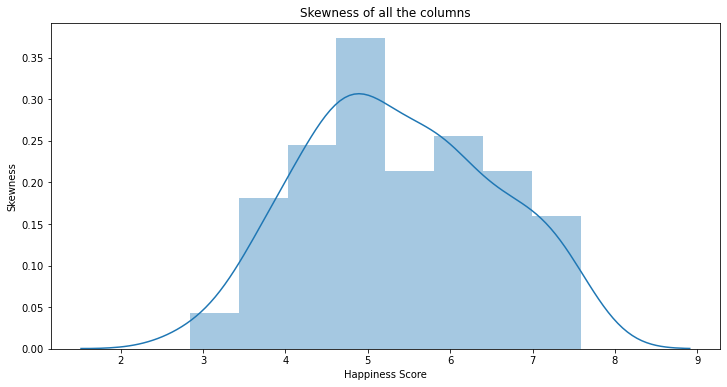

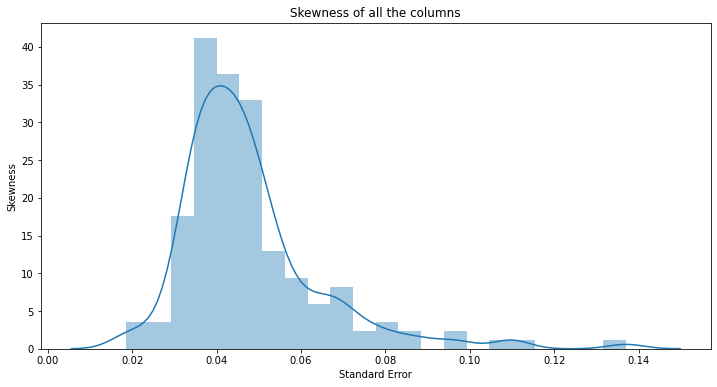

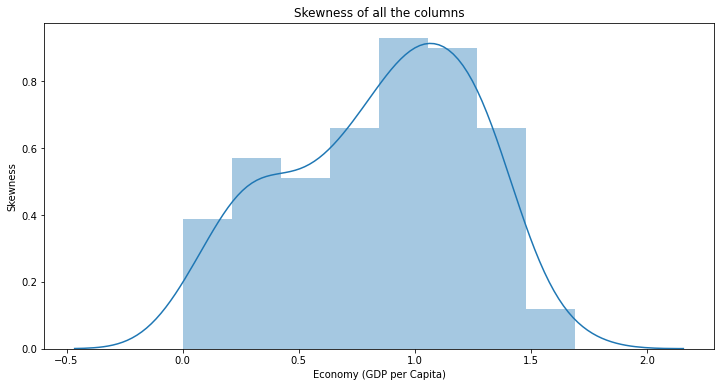

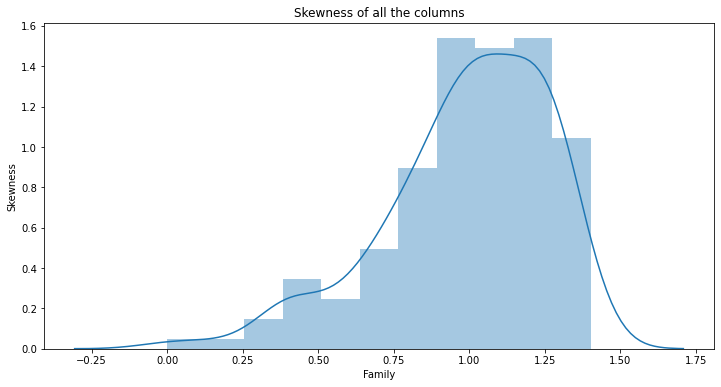

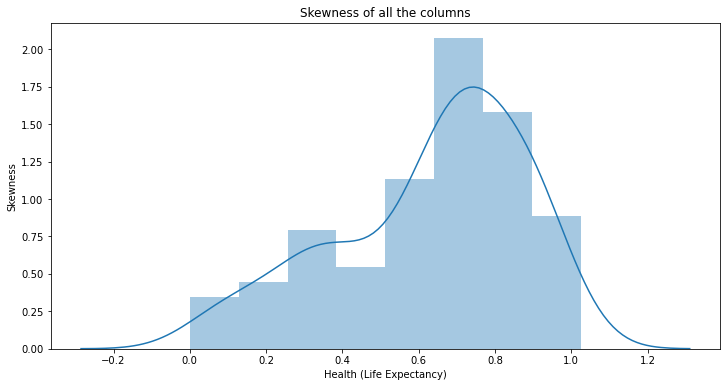

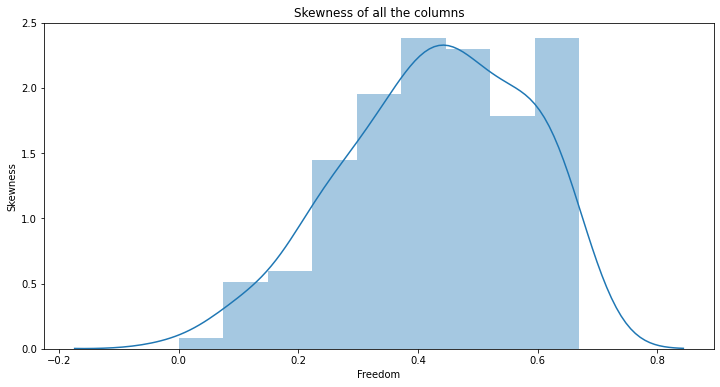

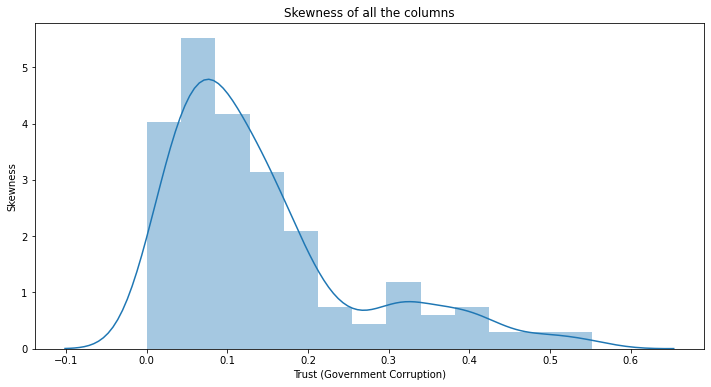

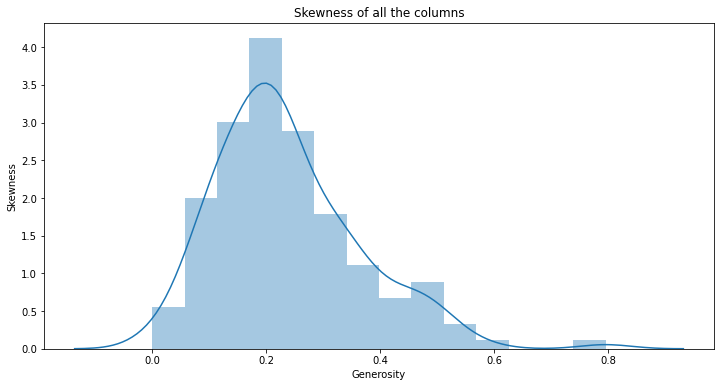

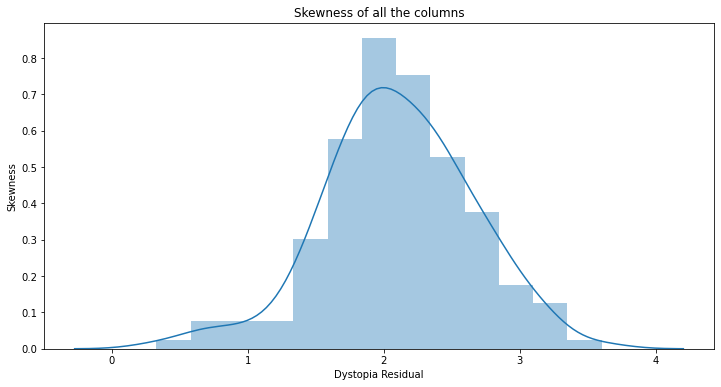

In [30]:
for i in col:
    plt.figure(figsize = (12,6))
    plt.title("Skewness of all the columns")
    plt.ylabel("Skewness")
    sns.distplot(ds[i])

form the above plot we can see all the columns are now normalize

Now we will see if there are any outliers in the datset or not by using the boxplot

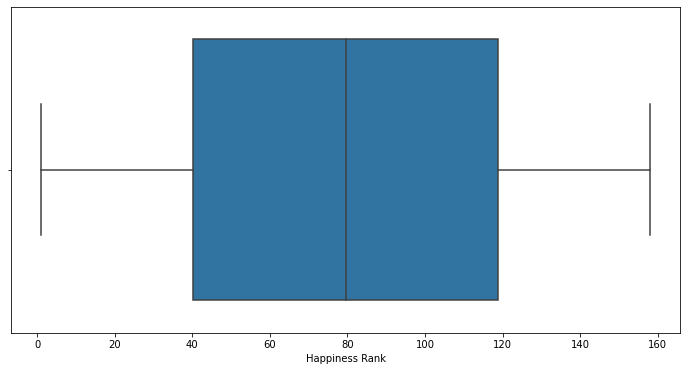

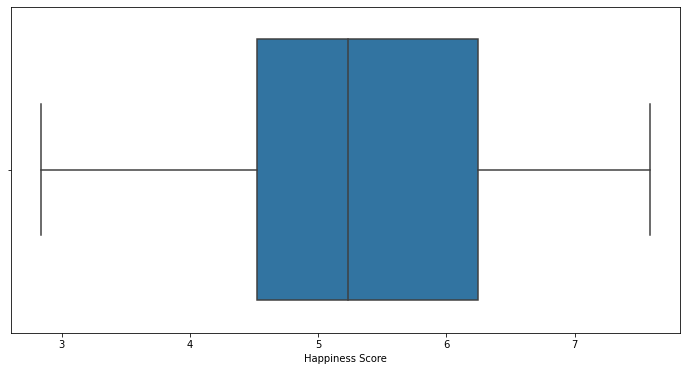

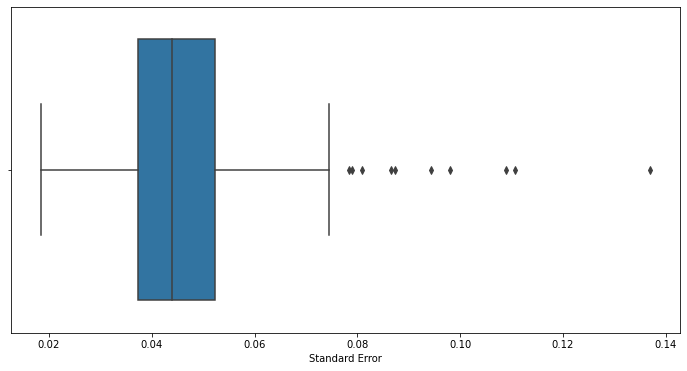

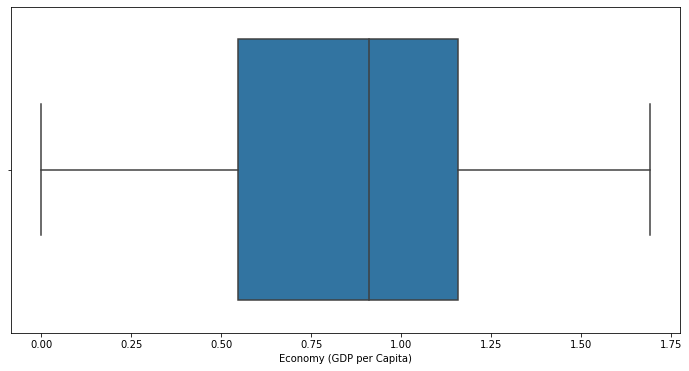

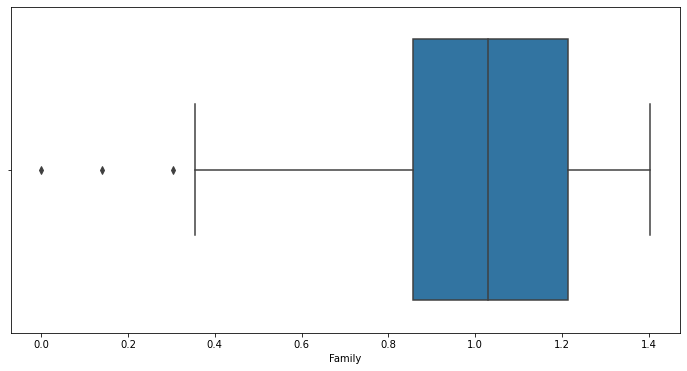

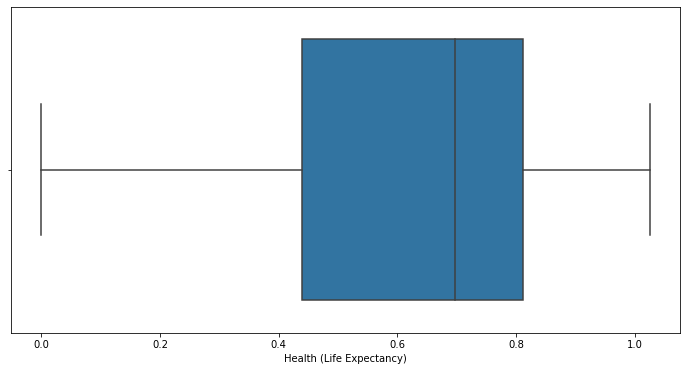

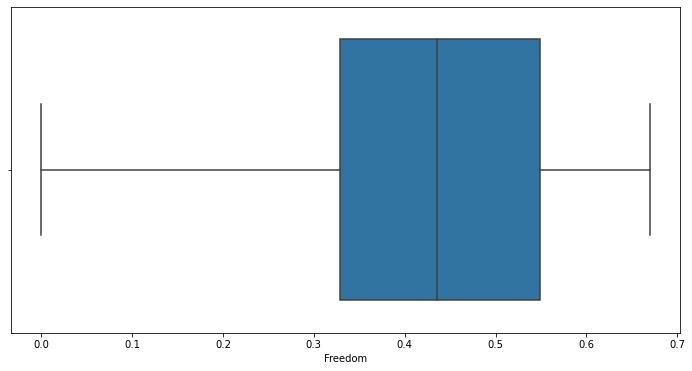

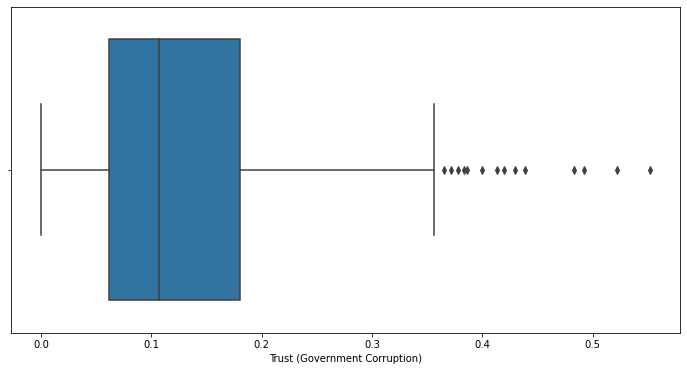

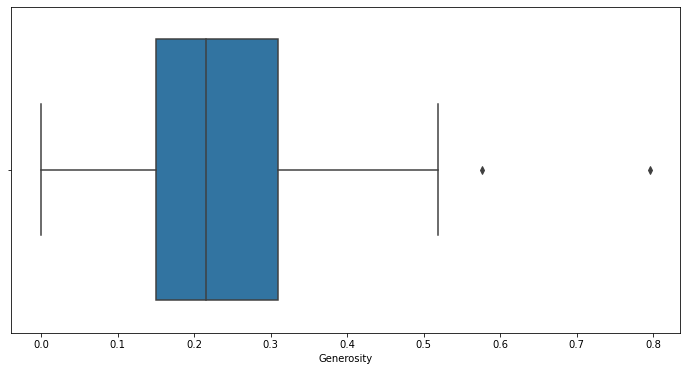

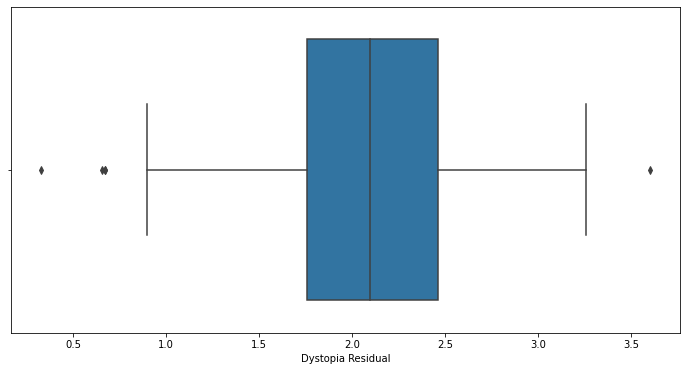

In [31]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.boxplot(ds[i])

By looking at the boxplot we can see very less number of outlier and as they are very close to the optimum value we will not remove the outliers from the datset

In [32]:
ds.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Now we have to seperate the dependent and independent variable from the dataset here dependent variable is Happiness Score and independent variable is rest of the columns So we will now split the column in X and Y 

In [33]:
X = ds.drop('Happiness Score', axis = 1)

In [34]:
Y = ds['Happiness Score']

In [35]:
print(X.shape)
print(Y.shape)

(158, 9)
(158,)


As we have seperated dependent and independent column now we will split the data in training and testing data

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 73)

Now we will find the best random state of the variable using loop

In [37]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, Y_train)
    pred = dtr.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum accuracy is:",maxacc,"at random_state:",maxrs)

Maximum accuracy is: 0.9982697922581389 at random_state: 73


By above we came to know that the maximum accuracy is 99.82% at random_state = 73

Now we will apply all the algorithms at random_state 73 and will see which has greater accuracy score

In [38]:
model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), AdaBoostRegressor(), KNeighborsRegressor()]

In [70]:
for m in model:
    print("Model Name", m)
    m.fit(X_train, Y_train)
    m.score(X_train, Y_train)
    pred = m.predict(X_test)
    print('Accuracy Score:', r2_score(Y_test, pred))

Model Name LinearRegression()
Accuracy Score: 0.9999999373333961
Model Name DecisionTreeRegressor()
Accuracy Score: 0.996033521277008
Model Name RandomForestRegressor()
Accuracy Score: 0.994442603107341
Model Name SVR()
Accuracy Score: 0.984134667712558
Model Name AdaBoostRegressor()
Accuracy Score: 0.9868779834364263
Model Name KNeighborsRegressor()
Accuracy Score: 0.995312747391024


In [71]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
print("Accuracy Score:", r2_score(Y_test, predlr))

Accuracy Score: 0.9999999373333961


In [72]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
preddtr = dtr.predict(X_test)
print("Accuracy Score:",r2_score(Y_test,preddtr))

Accuracy Score: 0.9969878000661906


In [73]:
rtr = RandomForestRegressor()
rtr.fit(X_train, Y_train)
predrtr = rtr.predict(X_test)
print("Accuracy Score:",r2_score(Y_test, predrtr))

Accuracy Score: 0.9957760892023713


In [74]:
svr = SVR()
svr.fit(X_train, Y_train)
predsvr = svr.predict(X_test)
print("Accuracy Score:", r2_score(Y_test, predsvr))

Accuracy Score: 0.984134667712558


In [75]:
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
print("Accuracy Score:",r2_score(Y_test, predadb))

Accuracy Score: 0.9923905725560884


In [76]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
print("Accuracy Score:", r2_score(Y_test, predknn))

Accuracy Score: 0.995312747391024


Above we can see all the model accuracy score and the accuracy score is very high now we will check the accuracy score for overfitting using cross validation score

In [77]:
scorelr = cross_val_score(lr, X, Y, cv = 5, scoring='r2')
scorelr.mean()

0.9999982015731523

In [78]:
scoredtr = cross_val_score(dtr, X, Y, cv = 5, scoring='r2')
scoredtr.mean()

-1.4296722215250537

In [79]:
scorertr = cross_val_score(rtr, X, Y, cv = 5, scoring='r2')
scorertr.mean()

-1.634887549676271

In [80]:
scoresvr = cross_val_score(svr, X, Y, cv=5, scoring='r2')
scoresvr.mean()

-0.6367272712903651

In [81]:
scoreadb = cross_val_score(adb, X, Y, cv=5, scoring='r2')
scoreadb.mean()

-2.6282739927284227

In [82]:
scoreknn = cross_val_score(knn, X, Y, cv = 5, scoring='r2')
scoreknn.mean()

-1.4250699463738687

In [83]:
diff_dict = {"Model Name":['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','SVR','AdaboostRegressor','KNNeighbourRegressor'],
            "Before Cross Validation":[r2_score(Y_test, predlr)*100, r2_score(Y_test, preddtr)*100, r2_score(Y_test, predrtr)*100, r2_score(Y_test, predsvr)*100, r2_score(Y_test, predadb)*100, r2_score(Y_test, predknn)*100],
            "After Cross Validation":[scorelr.mean()*100,scoredtr.mean()*100,scorertr.mean()*100,scoresvr.mean()*100,scoreadb.mean()*100,scoreknn.mean()*100]}

In [84]:
diff_dict

{'Model Name': ['LinearRegression',
  'DecisionTreeRegressor',
  'RandomForestRegressor',
  'SVR',
  'AdaboostRegressor',
  'KNNeighbourRegressor'],
 'Before Cross Validation': [99.99999373333961,
  99.69878000661906,
  99.57760892023713,
  98.4134667712558,
  99.23905725560884,
  99.5312747391024],
 'After Cross Validation': [99.99982015731523,
  -142.96722215250537,
  -163.4887549676271,
  -63.67272712903651,
  -262.8273992728423,
  -142.50699463738687]}

In [85]:
Difference = pd.DataFrame.from_dict(diff_dict)

In [86]:
Difference

,Model Name,Before Cross Validation,After Cross Validation
0,LinearRegression,99.999994,99.999820
1,DecisionTreeRegressor,99.698780,-142.967222
2,RandomForestRegressor,99.577609,-163.488755
3,SVR,98.413467,-63.672727
4,AdaboostRegressor,99.239057,-262.827399
5,KNNeighbourRegressor,99.531275,-142.506995


From Above we can tell that Linear Regreesion has the Highest accuracy so now we will perdorm GridSearchCV to inturn increase the accuracy of the model

In [87]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters, cv=None)
grid.fit(X_train, Y_train)
print ("R2 Score : ", grid.best_score_)

R2 Score :  0.9999999174112443


In [88]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

here we find the best parameters for LinearRegression now we will apply this parameter and we will get the heighest accuracy for that model

In [89]:
lr = LinearRegression(copy_X=True, fit_intercept=False, normalize=True)

In [90]:
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
print("Accuracy Score:", r2_score(Y_test, predlr))

Accuracy Score: 0.9999999361816965


Here we get the highest accuracy score for the dataset using LinearRegression and got 99.99% accuracy.

In [91]:
parametersdtr = {'max_depth':np.arange(2,15),
             'criterion':['mse','friedman_mse','mae','poisson']}

In [92]:
GCV = GridSearchCV(DecisionTreeRegressor(),parametersdtr, cv=5)

In [93]:
GCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [94]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 11}

In [95]:
GCV_pred = GCV.best_estimator_.predict(X_test)

In [96]:
print("Accuracy Score", r2_score(Y_test, GCV_pred))

Accuracy Score 0.9922326159584103


By using Decision tree regressor we are getting 99.22% accuracy so now we will compare between two models a)LinearRegression and b) Decision Tree and find out which has more accuracy score

In [97]:
LineaRegression_pred = grid.best_estimator_.predict(X_test)

In [98]:
print("Accuracy Score of Linear Regression is :", r2_score(Y_test, LineaRegression_pred))
print("Accuracy Score of Decision Tree Regressor is :", r2_score(Y_test, GCV_pred))

Accuracy Score of Linear Regression is : 0.9999999361816965
Accuracy Score of Decision Tree Regressor is : 0.9922326159584103


From above tab we come to know that Linear Regression has the heighest accuracy so we will choose Linear Regression as our model and we will create a pkl file for Linear Regression

## Here is the final step by exporting the model file into our local machine so that we can deploy it.

In [68]:
joblib.dump(grid.best_estimator_, 'HappinessScoreReport.pkl')

['HappinessScoreReport.pkl']